In [54]:
import pandas as pd
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer

In [3]:
df = pd.read_csv('~/Documents/PythonProjects/telco_customer.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [6]:
 df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
len(df.loc[df['TotalCharges'] == ' '])

11

In [8]:
df.loc[df['TotalCharges']== ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.loc[(df['TotalCharges'] == ' '), 'TotalCharges']  = 0

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [11]:
df.loc[df['TotalCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


In [12]:
df.loc[(df['Churn'] == 'No'), 'Churn'] = 0
df.loc[(df['Churn'] == 'Yes'), 'Churn'] = 1

In [13]:
df['Churn'] = df['Churn'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.replace(' ', '_', regex=True, inplace=True)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No_phone_service,DSL,Yes,...,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber_optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1


In [16]:
X = df.drop(['customerID','Churn'], axis=1).copy()
y = df['Churn'].copy()

In [17]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [28]:
X = pd.get_dummies(X, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [29]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,1,29.85,29.85,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [20]:
sum(y)/len(y)

0.2653698707936959

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [31]:
X_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
6661,72,53.65,3784.00,1,0,1,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
4811,4,46.00,193.60,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
2193,56,21.20,1238.65,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1904,56,94.45,5124.60,0,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
6667,9,79.55,723.40,1,0,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0


In [22]:
sum(y_train)/len(y_train)

0.2654297614539947

In [23]:
sum(y_test)/len(y_test)

0.26519023282226006

In [32]:
ltv_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
ltv_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-aucpr:0.63160
[1]	validation_0-aucpr:0.64538
[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64429
[4]	validation_0-aucpr:0.63866
[5]	validation_0-aucpr:0.63419
[6]	validation_0-aucpr:0.63912
[7]	validation_0-aucpr:0.63787
[8]	validation_0-aucpr:0.63779
[9]	validation_0-aucpr:0.63894
[10]	validation_0-aucpr:0.63680
[11]	validation_0-aucpr:0.63828


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [34]:
param_grid = {'max_depth': [6, 7 ,8],
             'learning_rate': [0.3, 0.1, 0.05],
             'gamma': [0, 0.25, 1.0],
             'reg_lambda':[0, 1.0, 10.0],
             'scale_pos_weight':[1,3,5],
             'min_child_weight':[1,3,5]}

In [35]:
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(seed=42, subsample=0.9, colsample_bytree=0.5),
    param_grid=param_grid,scoring='roc_auc', verbose=0, n_jobs=10, cv=3 )

optimal_params.fit(X_train,
            y_train,
            verbose=False,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test, y_test)])

print(optimal_params.best_params_)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


In [42]:
param_grid = {'max_depth': [7],
             'learning_rate': [0.1],
             'gamma': [0.25],
             'reg_lambda':[10.0, 100, 150],
             'scale_pos_weight':[1],
             'min_child_weight':[3]}

In [43]:
optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(seed=42, subsample=0.9, colsample_bytree=0.5),
    param_grid=param_grid,scoring='roc_auc', verbose=0, n_jobs=10, cv=3 )

optimal_params.fit(X_train,
            y_train,
            verbose=False,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test, y_test)])

print(optimal_params.best_params_)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'reg_lambda': 100, 'scale_pos_weight': 1}


In [50]:
ltv_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            gamma=0.25, 
                            learning_rate=0.1,
                            max_depth=7,
                            seed=42,
                            reg_lambda=100,
                            min_child_weight=3,
                            scale_pos_weight=1,
                            subsample=0.9,
                            colsample_bytree=0.5)
ltv_xgb.fit(X_train,
            y_train,
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='aucpr',
            eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.58590
[1]	validation_0-aucpr:0.58561
[2]	validation_0-aucpr:0.59083
[3]	validation_0-aucpr:0.59745
[4]	validation_0-aucpr:0.59989
[5]	validation_0-aucpr:0.60710
[6]	validation_0-aucpr:0.60764
[7]	validation_0-aucpr:0.61067
[8]	validation_0-aucpr:0.61013
[9]	validation_0-aucpr:0.61380
[10]	validation_0-aucpr:0.61745
[11]	validation_0-aucpr:0.61647
[12]	validation_0-aucpr:0.61805
[13]	validation_0-aucpr:0.61858
[14]	validation_0-aucpr:0.61885
[15]	validation_0-aucpr:0.61890
[16]	validation_0-aucpr:0.61915
[17]	validation_0-aucpr:0.62162
[18]	validation_0-aucpr:0.62177
[19]	validation_0-aucpr:0.62179
[20]	validation_0-aucpr:0.62486
[21]	validation_0-aucpr:0.62576
[22]	validation_0-aucpr:0.62508
[23]	validation_0-aucpr:0.62499
[24]	validation_0-aucpr:0.62602
[25]	validation_0-aucpr:0.62478
[26]	validation_0-aucpr:0.62913
[27]	validation_0-aucpr:0.63039
[28]	validation_0-aucpr:0.62914
[29]	validation_0-aucpr:0.63088
[30]	validation_0-aucpr:0.63444
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.25, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=100, scale_pos_weight=1,
              seed=42, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [51]:
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb.score(X_test[X_train.columns], y_test)))

y_pred = ltv_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 0.82
Accuracy of XGB classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.67      0.49      0.57       467

    accuracy                           0.80      1761
   macro avg       0.75      0.70      0.72      1761
weighted avg       0.79      0.80      0.79      1761



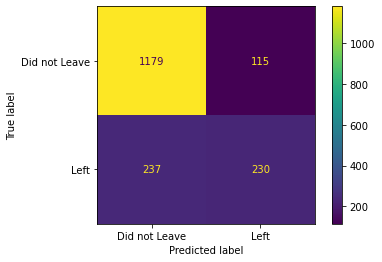

In [52]:
plot_confusion_matrix(ltv_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=["Did not Leave", "Left"])

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

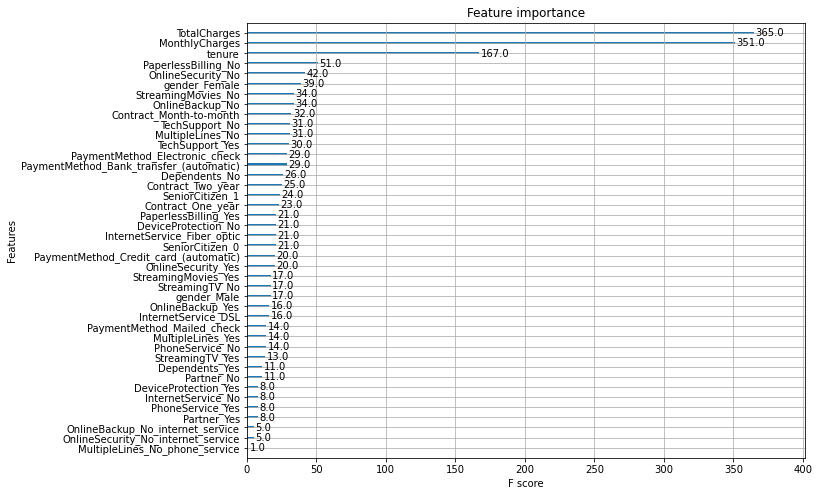

In [55]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(ltv_xgb, ax=ax)

In [59]:
X['prob'] = ltv_xgb.predict_proba(X[X_train.columns])[:,1]

In [60]:
X['prob'].head()

0    0.621584
1    0.059181
2    0.376500
3    0.049722
4    0.700799
Name: prob, dtype: float32

In [85]:
len(X['prob'])

7043

In [86]:
df1 = X['prob'].copy()

In [87]:
df['prob'] = X['prob']

In [90]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prob
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,0,0.621584
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One_year,No,Mailed_check,56.95,1889.50,0,0.059181
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1,0.376500
3,7795-CFOCW,Male,0,No,No,45,No,No_phone_service,DSL,Yes,...,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,0,0.049722
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber_optic,No,...,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1,0.700799


In [95]:
df.loc[df['prob'] >= 0.6]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prob
0,7590-VHVEG,Female,0,Yes,No,1,No,No_phone_service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,0,0.621584
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber_optic,No,...,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1,0.700799
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber_optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1,0.849178
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber_optic,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1,0.612056
20,8779-QRDMV,Male,1,No,No,1,No,No_phone_service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic_check,39.65,39.65,1,0.718968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber_optic,No,...,No,No,No,Month-to-month,Yes,Electronic_check,74.45,74.45,1,0.827249
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber_optic,No,...,No,No,No,Month-to-month,Yes,Mailed_check,70.65,70.65,1,0.751042
7029,2235-DWLJU,Female,1,No,No,6,No,No_phone_service,DSL,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic_check,44.40,263.05,0,0.605631
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber_optic,No,...,No,No,No,Month-to-month,Yes,Electronic_check,75.75,75.75,1,0.830295
